In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# # Only for use in Google Colab
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/REU/Classificiation-Academic-Success/data/train.csv/train.csv"
data = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title
# read in data
data_path = "data\\train.csv\\train.csv"
data = pd.read_csv(data_path)

print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
labels = data['Target']
data = data.drop(['Target'], axis=1)
data = data.drop(['id'], axis=1)

# Preprocessing

In [5]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# # normalize
# norm_features = ['']
# data = (data - data.min()) / (data.max() - data.min())


In [ ]:
# @title
## PCA
corr_matrix = abs(data.corr())

threshold = 0.7
high_corr = corr_matrix[corr_matrix >= threshold].fillna(0)

heat_map = px.imshow(high_corr,
                     labels=dict(color="Correlation"),
                     x=corr_matrix.columns,
                     y=corr_matrix.columns,
                     width = 1000,
                     height = 1000)

heat_map.show()

In [6]:
remove_columns = ["Father's occupation",
                  "Nacionality",
                  "Curricular units 1st sem (credited)",
                  "Curricular units 1st sem (grade)",
                  "Curricular units 1st sem (enrolled)",
                  "Curricular units 1st sem (evaluations)",
                  "Curricular units 1st sem (approved)",
                  "Curricular units 2nd sem (grade)"]
reduced_data = data.drop(columns=remove_columns)

In [ ]:
# @title
# revised PCA
corr_matrix = abs(reduced_data.corr())

# threshold = 0.7
# high_corr = corr_matrix[corr_matrix >= threshold].fillna(0)

heat_map = px.imshow(corr_matrix,
                     labels=dict(color="Correlation"),
                     x=corr_matrix.columns,
                     y=corr_matrix.columns,
                     width = 900,
                     height = 900)

heat_map.show()

In [ ]:
# @title
# information gain
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(reduced_data, labels)


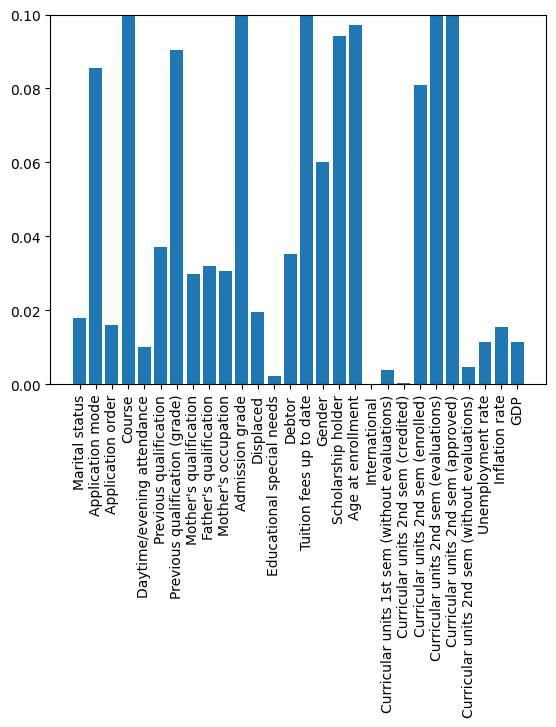

In [ ]:
# @title
plt.bar(x = reduced_data.columns,height = importances)
plt.xticks(rotation='vertical')
plt.ylim([0, 0.1])
plt.show()


In [7]:
# more to drop
drop_columns = ["Educational special needs",
                "International",
                "Curricular units 2nd sem (without evaluations)",
                "Curricular units 2nd sem (credited)",
                "Curricular units 1st sem (without evaluations)"]
reduced_data = reduced_data.drop(columns=drop_columns)

In [ ]:
# %pip install skfeature-chappers

# ## Fisher's Score - crashes
# from skfeature.function.similarity_based import fisher_score

# ranks = fisher_score.fisher_score(np.asarray(reduced_data), np.asarray(labels))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
print(reduced_data.info())
reduced_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marital status                          76518 non-null  int64  
 1   Application mode                        76518 non-null  int64  
 2   Application order                       76518 non-null  int64  
 3   Course                                  76518 non-null  int64  
 4   Daytime/evening attendance              76518 non-null  int64  
 5   Previous qualification                  76518 non-null  int64  
 6   Previous qualification (grade)          76518 non-null  float64
 7   Mother's qualification                  76518 non-null  int64  
 8   Father's qualification                  76518 non-null  int64  
 9   Mother's occupation                     76518 non-null  int64  
 10  Admission grade                         76518 non-null  fl

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,19,5,...,1,0,1,18,6,7,6,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,19,19,9,...,1,0,0,18,6,9,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,3,19,2,...,1,1,0,18,6,0,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,19,3,3,...,1,0,1,18,8,11,7,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,19,37,4,...,1,0,0,18,7,12,6,7.6,2.6,0.32


In [ ]:
def analyze_dataframe(df):
    analysis = {}

    for column in df.columns:
        unique_values = df[column].unique()
        num_unique = len(unique_values)
        min_value = df[column].min()
        max_value = df[column].max()

        if df[column].dtype == 'object' or num_unique < 10:
            column_type = 'categorical'
        else:
            column_type = 'continuous'

        analysis[column] = {
            'type': column_type,
            'num_unique': num_unique,
            'unique_values': unique_values,
            'min': min_value,
            'max': max_value
        }

    return analysis

analysis_result = analyze_dataframe(reduced_data)
pd.DataFrame( analysis_result )

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Unemployment rate,Inflation rate,GDP
type,categorical,continuous,categorical,continuous,categorical,continuous,continuous,continuous,continuous,continuous,...,categorical,categorical,categorical,continuous,continuous,continuous,continuous,continuous,continuous,continuous
num_unique,6,22,8,19,2,21,110,35,39,40,...,2,2,2,46,22,31,21,11,13,11
unique_values,"[1, 2, 4, 3, 5, 6]","[1, 17, 39, 44, 7, 18, 15, 16, 53, 43, 51, 42,...","[1, 2, 3, 6, 4, 5, 0, 9]","[9238, 9254, 9500, 171, 9085, 9773, 9003, 9853...","[1, 0]","[1, 19, 39, 40, 12, 3, 2, 42, 4, 9, 11, 6, 15,...","[126.0, 125.0, 137.0, 131.0, 132.0, 133.1, 130...","[1, 19, 3, 37, 38, 34, 2, 12, 4, 5, 41, 40, 9,...","[19, 3, 37, 38, 1, 34, 39, 4, 2, 12, 30, 29, 1...","[5, 9, 2, 3, 4, 1, 7, 0, 90, 191, 6, 144, 99, ...",...,"[1, 0]","[0, 1]","[1, 0]","[18, 24, 21, 19, 29, 27, 20, 34, 26, 28, 53, 3...","[6, 8, 7, 0, 5, 13, 9, 11, 10, 4, 12, 14, 2, 1...","[7, 9, 0, 11, 12, 8, 6, 10, 13, 5, 15, 19, 16,...","[6, 0, 7, 5, 4, 3, 8, 13, 2, 1, 10, 11, 9, 12,...","[11.1, 16.2, 7.6, 13.9, 12.4, 10.8, 9.4, 12.7,...","[0.6, 0.3, 2.6, -0.3, 0.5, 1.4, -0.8, 3.7, 2.8...","[2.02, -0.92, 0.32, 0.79, 1.79, 1.74, -3.12, -..."
min,1,1,0,33,0,1,95.0,1,1,0,...,0,0,0,17,0,0,0,7.6,-0.8,-4.06
max,6,53,9,9991,1,43,190.0,44,44,194,...,1,1,1,70,23,33,20,16.2,3.7,3.51


In [ ]:
# Normalization


In [ ]:
# Show label distrubtuion
fig = px.pie(labels, names='Target')
fig.show()

In [8]:
# split into train / test
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(reduced_data,
                                                    labels,
                                                    test_size= .2,
                                                    random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(61214, 23)
(15304, 23)
(61214,)
(15304,)


# Submission 1:

RandomForestClassifier(n_estimators=120, max_depth=18, min_samples_leaf=1)

Public Score: 0.82258

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Random Forest

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)
y_preds_train = clf.predict(x_train)

In [ ]:
acc = accuracy_score(y_test, y_preds)
print(f'Test: {acc}')
acc = accuracy_score(y_train, y_preds_train)
print(f'Train: {acc}')

Test: 0.8186095138525875
Train: 0.9998856470741987


In [ ]:
##############################
### Tuning Hyperparamete
##############################
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [5, 10, 20, 50, 100],
    'max_depth': [4, 6, 8, 12],
    'min_samples_leaf': [1, 2, 3, 4]
}

# cv = k-fold cross validation
### split data into k sections/subsets, use k-1 sections as train and other one as test
### repeat k times with test section changing each time
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
clf.fit(x_train, y_train)

# need training & validation score, and best model
print(clf.best_score_)
print(clf.best_params_)

0.8172966897000767
{'max_depth': 12, 'min_samples_leaf': 1, 'n_estimators': 100}


In [ ]:
##############################
### Tuning Hyperparamete
##############################
parameters = {
    'n_estimators': [100, 110, 120, 140, 150],
    'max_depth': [12,18, 25, 30]
}

# cv = k-fold cross validation
### split data into k sections/subsets, use k-1 sections as train and other one as test
### repeat k times with test section changing each time
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
clf.fit(x_train, y_train)

# need training & validation score, and best model
print(clf.best_score_)
print(clf.best_params_)

0.8188322783943182
{'max_depth': 18, 'n_estimators': 120}


In [ ]:
clf = RandomForestClassifier(n_estimators=120, max_depth=18, min_samples_leaf=1)
clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)
y_preds_train = clf.predict(x_train)

acc = accuracy_score(y_test, y_preds)
print(f'Test: {acc}')
acc = accuracy_score(y_train, y_preds_train)
print(f'Train: {acc}')

Test: 0.8214192368008364
Train: 0.9322377233966086


# Gradient Boost

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)
y_preds_train = clf.predict(x_train)

acc = accuracy_score(y_test, y_preds)
print(f'Test: {acc}')
acc = accuracy_score(y_train, y_preds_train)
print(f'Train: {acc}')

Test: 0.8226607422895975
Train: 0.823618780017643


In [ ]:
##############################
### Tuning Hyperparamete
##############################
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 120, 150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    # 'min_samples_leaf': [1, 2, 3],
}

# cv = k-fold cross validation
### split data into k sections/subsets, use k-1 sections as train and other one as test
### repeat k times with test section changing each time
clf = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters, cv=5)
clf.fit(x_train, y_train)

# need training & validation score, and best model
print(clf.best_score_)
print(clf.best_params_)

# Kaggle Test Data

In [ ]:
# Test Data
test_data = pd.read_csv("data\\test.csv\\test.csv")

test_data = test_data.drop(['id'], axis=1)
test_data.dropna(inplace=True)
test_data.drop_duplicates(inplace=True)
remove_columns = ["Father's occupation",
                  "Nacionality",
                  "Curricular units 1st sem (credited)",
                  "Curricular units 1st sem (grade)",
                  "Curricular units 1st sem (enrolled)",
                  "Curricular units 1st sem (evaluations)",
                  "Curricular units 1st sem (approved)",
                  "Curricular units 2nd sem (grade)"]
test_data.drop(columns=remove_columns, inplace=True)
drop_columns = ["Educational special needs",
                "International",
                "Curricular units 2nd sem (without evaluations)",
                "Curricular units 2nd sem (credited)",
                "Curricular units 1st sem (without evaluations)"]
test_data.drop(columns=drop_columns, inplace=True)


# run with model
###### model: clf = RandomForestClassifier(n_estimators=120, max_depth=18, min_samples_leaf=1)
df = clf.predict(test_data)
df = pd.DataFrame( df )

# add index column
# df["id"] = df.index

# export to csv
df.to_csv('out.csv', index=True)

# Submission 2:

CNN

Public Score:

In [ ]:
import tensorflow as tf

In [ ]:
# Reshape for 1D CNN: (samples, features, channels)
x_train = x_train.to_numpy()
x_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

x_test = x_test.to_numpy()
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# One Hot Encode Y
y_train_1hot = pd.get_dummies(y_train)
y_test_1hot = pd.get_dummies(y_test)

y_train_1hot.head(5)

,Dropout,Enrolled,Graduate
12065,False,False,True
17210,True,False,False
60954,False,False,True
2322,False,True,False
374,True,False,False


In [ ]:
model = tf.keras.Sequential([
            tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='leaky_relu'),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='leaky_relu'),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_reshaped, y_train_1hot,
          epochs=20,
          validation_split = .1,
          verbose = 2,
          callbacks = early_stopping,
          batch_size = 100)

Epoch 1/20
551/551 - 31s - loss: 2.9371 - accuracy: 0.5606 - val_loss: 0.5903 - val_accuracy: 0.7563 - 31s/epoch - 57ms/step
Epoch 2/20
551/551 - 2s - loss: 0.5800 - accuracy: 0.7756 - val_loss: 0.6014 - val_accuracy: 0.7831 - 2s/epoch - 4ms/step
Epoch 3/20
551/551 - 3s - loss: 0.5568 - accuracy: 0.7840 - val_loss: 0.5380 - val_accuracy: 0.7919 - 3s/epoch - 5ms/step
Epoch 4/20
551/551 - 3s - loss: 0.5495 - accuracy: 0.7862 - val_loss: 0.5317 - val_accuracy: 0.7968 - 3s/epoch - 5ms/step
Epoch 5/20
551/551 - 3s - loss: 0.5401 - accuracy: 0.7889 - val_loss: 0.5274 - val_accuracy: 0.7911 - 3s/epoch - 6ms/step
Epoch 6/20
551/551 - 3s - loss: 0.5354 - accuracy: 0.7909 - val_loss: 0.5255 - val_accuracy: 0.7958 - 3s/epoch - 5ms/step
Epoch 7/20
551/551 - 2s - loss: 0.5317 - accuracy: 0.7921 - val_loss: 0.5489 - val_accuracy: 0.7744 - 2s/epoch - 4ms/step
Epoch 8/20
551/551 - 2s - loss: 0.5243 - accuracy: 0.7951 - val_loss: 0.5129 - val_accuracy: 0.7979 - 2s/epoch - 4ms/step
Epoch 9/20
551/551 - 

# Submission 3

SKLearn Model Stacking

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define a meta-model
# meta_model = LogisticRegression()

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models)

# Train the stacking model
stacking_clf.fit(x_train, y_train)


In [1]:
y_preds = stacking_clf.predict(x_test)
y_preds_train = stacking_clf.predict(x_train)

acc = accuracy_score(y_test, y_preds)
print(f'Test: {acc}')
acc = accuracy_score(y_train, y_preds_train)
print(f'Train: {acc}')

NameError: name 'stacking_clf' is not defined